# Data Science Job Postings and Salaries Analysis

The two datasets used in the mini-project are
- title_location_company_salary.xls
- Job_skills_qualifications.xls

---

## 1.  Problem Definition

Predict the **`salary`** of staffs using features in the two datasets.
- Analyze the `importance` of features that can be of help in increasing the salary.
- Find the `anomalies` of salary among the staffs.

---

## 2. Dataset Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_salary = pd.read_excel("title_location_company_salary.xls", converters = {'Salary' : int})
df_skills = pd.read_excel("Job_skills_qualifications.xls")

In [3]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Job_ID   1287 non-null   int64 
 1   Title    1287 non-null   object
 2   Company  1285 non-null   object
 3   City     1116 non-null   object
 4   State    1287 non-null   object
 5   Salary   1209 non-null   object
 6   Levels   1287 non-null   object
dtypes: int64(1), object(6)
memory usage: 70.5+ KB


In [4]:
df_salary.head(10)

,Job_ID,Title,Company,City,State,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,California,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,California,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,California,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,California,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,California,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,California,100000,Jr.
6,6,Data Scientist,IBM,San Jose,California,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,California,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,California,100000,Unknown
9,9,Data Scientist,City of Hope,NaN,California,NaN,Unknown


- The **`df_salary`** table shows the index, job title, company, city, state, salary and level for each staff.

In [5]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.5 MB


In [6]:
df_skills.head(5)

,Job_ID,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Scrum,VBA,Ceridian,MTA,New Relic,Sailpoint,DevOps,Backbone.js,Computer networking,Calibration
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The **`df_skills`** table shows the skills status for each staff. `1` means `have` and `0` means `dont have`.

---

## 3. Data Cleaning / Preparation


1.  Delete the **`State`** column in the **`df_salary`** table, as `state` is always California.

In [7]:
df_salary = df_salary.drop(columns = ['State'])

2.  Drop the rows in which the `Salary` cell in **`df_salary`** table is empty or skills info is missing in **`df_skills`** table.

In [8]:
df_salary['Salary'].fillna(-1, inplace = True)
df_skills.fillna(-1, inplace = True)
drop_rows = []
count = df_salary.shape[0]
for i in range(0, count) :
    if (df_salary['Salary'][i] < 0) | (df_skills['R'][i] < 0) :
        drop_rows.append(i)
df_salary = df_salary.drop(drop_rows)
df_skills = df_skills.drop(drop_rows)

In [9]:
df_salary.head(10)

,Job_ID,Title,Company,City,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,100000,Jr.
6,6,Data Scientist,IBM,San Jose,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,100000,Unknown
10,10,Data Scientist,Airtable,San Francisco,130000,Unknown


3.  As some company and city cells in **`df_salary`** table are also empty, instead of dropping them, we replace them into `Unknown`.

In [10]:
df_salary['Company'].fillna('Unknown', inplace = True)
df_salary['City'].fillna('Unknown', inplace = True)

4.  As there're too many skills listed in the **`df_skills`** table, so we decide to select some skills instead of all. 
To achieve the target, we build **`df_count`** table for each skill with its total count of all staffs.

In [11]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.4 MB


In [12]:
skills = df_skills.columns[1:]

In [13]:
sum_count = []
for i in skills:
    sum_count.append(sum(df_skills[i]))

In [14]:
df_count = pd.DataFrame()
df_count['skill'] = skills
df_count['skills_count'] = sum_count
df_count.describe()

,skills_count
count,255.000000
mean,35.658824
std,95.830997
min,0.000000
25%,2.000000
50%,5.000000
75%,23.500000
max,655.000000


<AxesSubplot:xlabel='skills_count', ylabel='Count'>

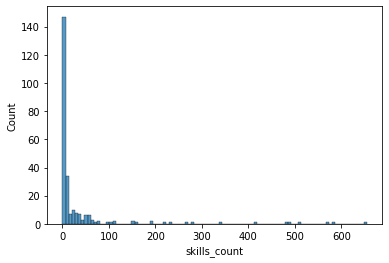

In [15]:
sns.histplot(data = df_count['skills_count'])

- Through the description and histogram of **`df_count`** table, we notice that the majority of skills' total count are less than `23.5` (75th percentile). Hence, we drop such skills and save the rest skills info into **`df_skills2`**.

In [16]:
df_count = df_count[df_count['skills_count'] > 23.5]

<AxesSubplot:ylabel='Count'>

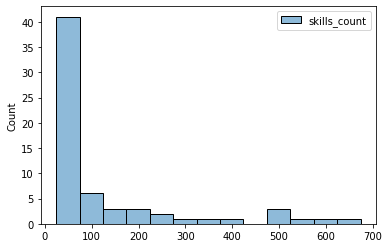

In [17]:
sns.histplot(data = df_count, binwidth = 50)

In [18]:
skills2 = list(df_count['skill'])
df_skills2 = df_skills[skills2].astype(int)
df_skills2['Job_ID'] = df_skills['Job_ID']
skills2

['Analysis skills',
 'Communication skills',
 'Research',
 'R',
 'Machine learning',
 "Bachelor's degree",
 "Master's degree",
 'Doctoral degree',
 'Doctor of Philosophy',
 'Relational databases',
 'Microsoft Excel',
 'Product management',
 'Natural language processing',
 'Python',
 'SQL',
 'Statistical analysis',
 'Data visualization',
 'Writing skills',
 'C++',
 'Leadership',
 'Computer vision',
 'C',
 'MATLAB',
 'Scala',
 'Hadoop',
 'Bachelor of Science',
 'PyTorch',
 'TensorFlow',
 'Data collection',
 'Data analytics',
 'Project management',
 'Analytics',
 'SAS',
 'Spark',
 'Shell Scripting',
 'Apache Hive',
 'Go',
 'US work authorization',
 'Signal processing',
 'Predictive analytics',
 'Deep learning',
 'Marketing automation',
 'System design',
 'E-commerce',
 'NumPy',
 'SciPy',
 'Elasticsearch',
 'Data modeling',
 'A/B testing',
 'Pandas',
 'Keras',
 'Apache',
 'Fraud',
 'Git',
 'Torch',
 'Azure',
 'NoSQL',
 'Master of Science',
 'Windows',
 'Scripting',
 'Marketing',
 'New Reli

4.  Combine two tables **`df_salary`** and **`df_skills2`** based on `Job_ID` into our final table **`df_staff`**.

In [19]:
df_staff = df_salary.merge(df_skills2)
df_staff.head(5)

,Job_ID,Title,Company,City,Salary,Levels,Analysis skills,Communication skills,Research,R,...,Torch,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5.  Save the tables into excel files.

In [20]:
df_salary.to_excel('Salary.xlsx', index = False)
df_skills2.to_excel('Skills.xlsx', index = False)
df_staff.to_excel('Staff.xlsx', index = False)

---

## 4. Data Analysis / Visualization

1. Check the number of unique levels for categorical data to determine suitable visualisation tool

In [21]:
print("Number of unqiue classes in Title :", len(df_staff["Title"].unique()))
print("Number of unqiue classes in Company :", len(df_staff["Company"].unique()))
print("Number of unqiue classes in City :", len(df_staff["City"].unique()))
print("Number of unqiue classes in Levels :", len(df_staff["Levels"].unique()))

Number of unqiue classes in Title : 13
Number of unqiue classes in Company : 501
Number of unqiue classes in City : 77
Number of unqiue classes in Levels : 7


2. Visualisation for **`Job Titles`**

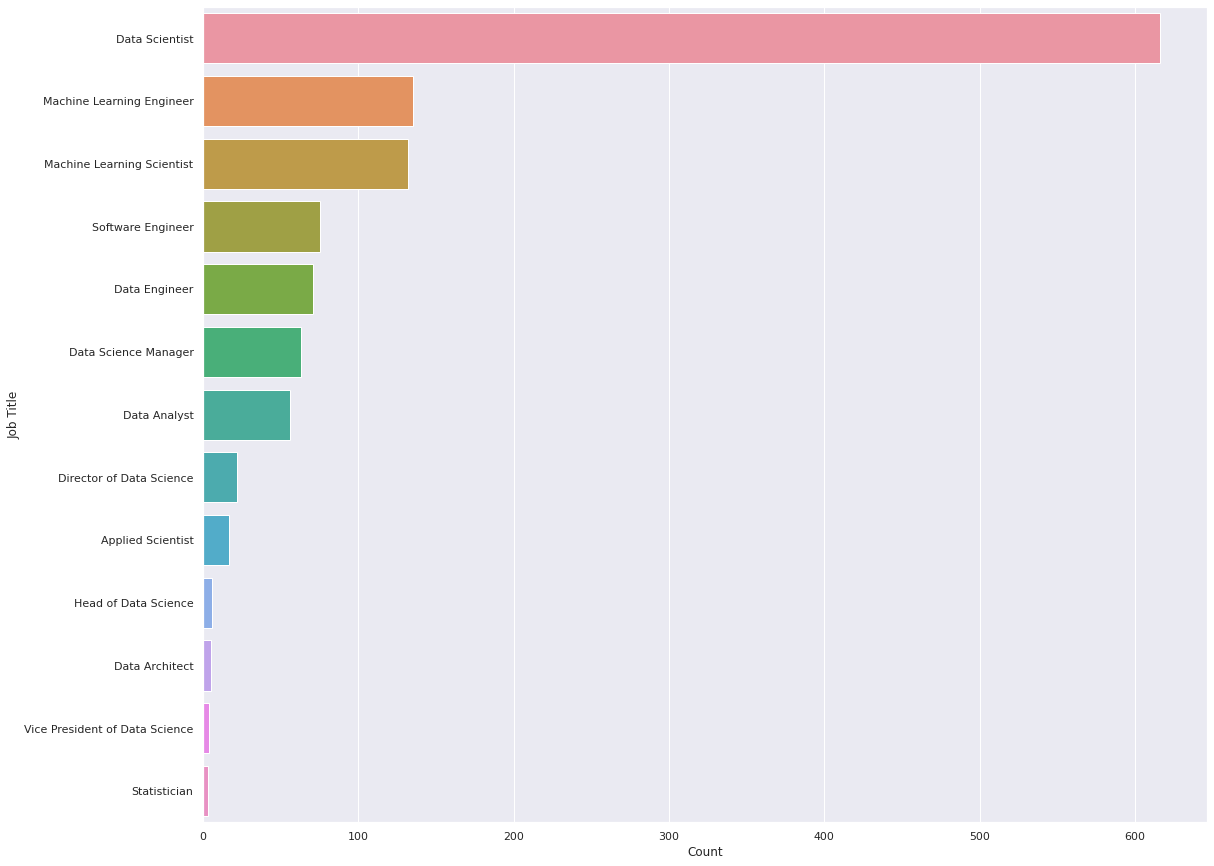

In [22]:
title_count = pd.DataFrame()
title_count = df_staff.loc[:,'Title'].value_counts()
title_count = title_count.to_frame()
title_count['Job Title'] = title_count.index
title_count = title_count.rename(columns = {'Title' : 'Count'})

plt.figure(figsize=(18, 15))
sns.set(font_scale = 1)
sns.barplot(data = title_count, x = 'Count', y = 'Job Title')
plt.show()

- In the countplot, the `Data Scientist` group is the most common occupation for our dataset by a significant margin, followed by `Machine Learning Engineer` and `Machine Learning Scientist`.
- Below, we have the boxplot of salary for each title.

<AxesSubplot:xlabel='Salary', ylabel='Title'>

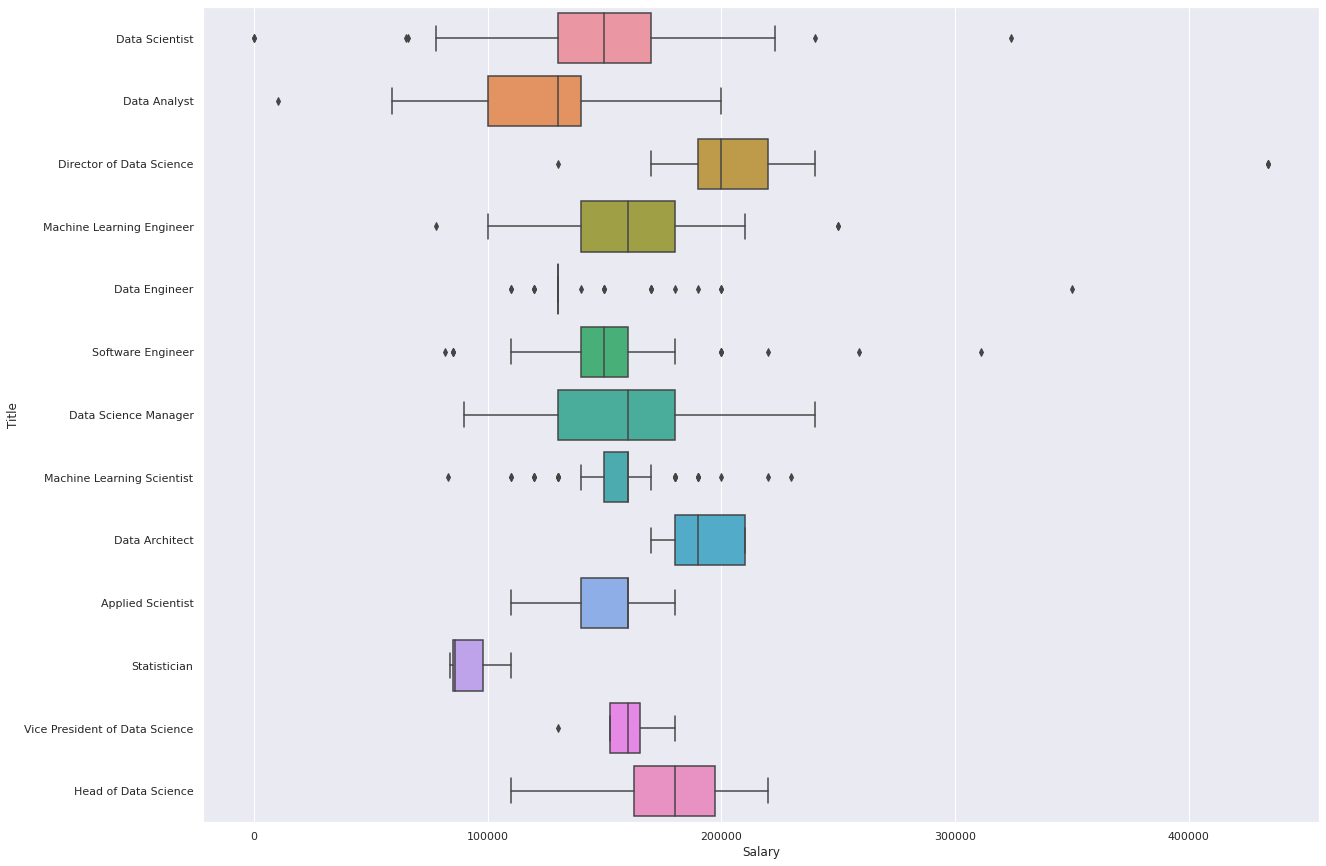

In [23]:
f, axes = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'Salary', y = 'Title', data = df_staff)

3. Visualisation for **`Company`**

In [24]:
company = pd.DataFrame(df_staff["Company"].value_counts())
company.describe()

,Company
count,501.000000
mean,2.405190
std,6.262387
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,103.000000


- Every company has a mean of only 1 employee, with 75% of companies having 2 or fewer employees.
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

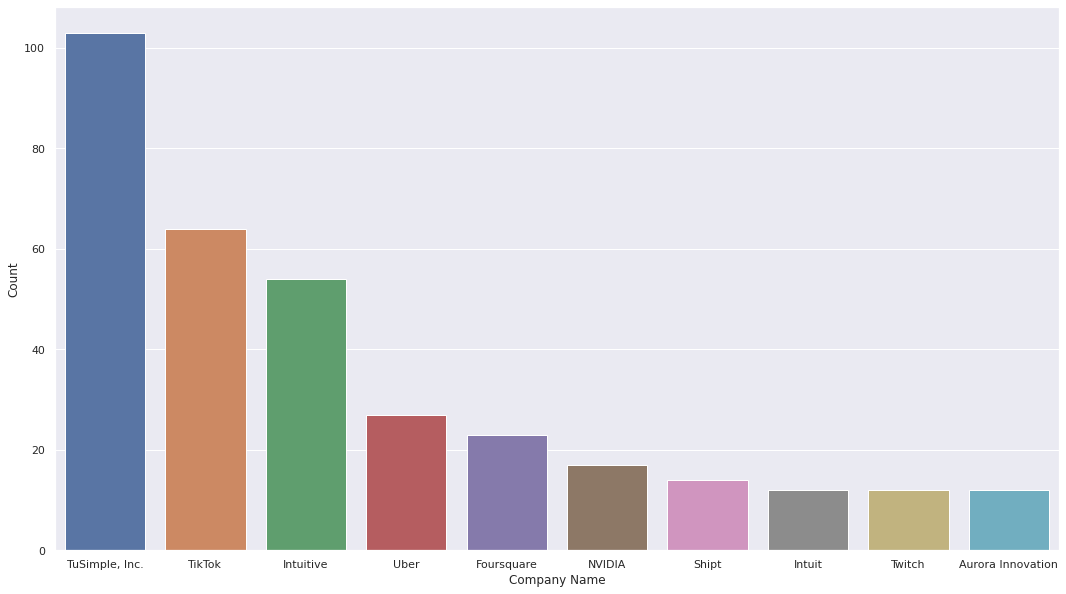

In [25]:
company_count = pd.DataFrame()
company_count = df_staff.loc[:,'Company'].value_counts()
company_count = company_count.to_frame()
company_count['Company Name'] = company_count.index
company_count = company_count.iloc[0:10 , :]
company_count = company_count.rename(columns = {'Company' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = company_count, x = 'Company Name', y = 'Count')
plt.show()

- Here, we show the `top-10` companies with largest count of staffs.

4. Visualisation for **`City`**

In [26]:
city = pd.DataFrame(df_staff["City"].value_counts())
city.describe()

,City
count,77.000000
mean,15.649351
std,46.309532
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,334.000000


- Similary, every city has a mean of only 2 employees, with 75% of cities having 6 or fewer employees. 
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

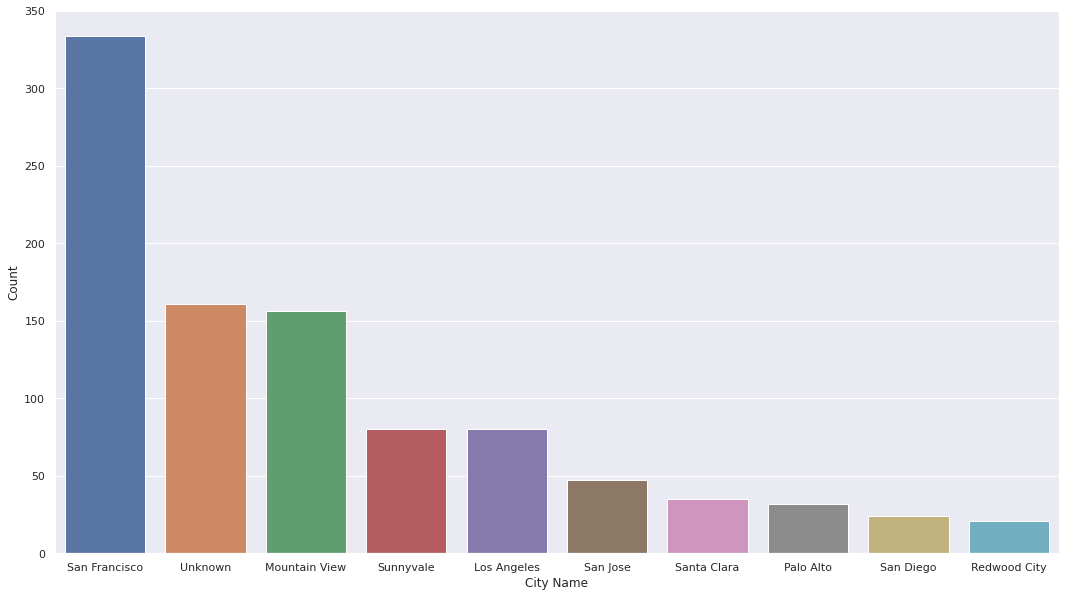

In [27]:
city_count = pd.DataFrame()
city_count = df_staff.loc[:,'City'].value_counts()
city_count = city_count.to_frame()
city_count['City Name'] = city_count.index
city_count = city_count.iloc[0:10 , :]
city_count = city_count.rename(columns = {'City' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = city_count, x = 'City Name', y = 'Count')
plt.show()

- Here, we show the `top-10` cities with largest count of workers.

5. Visualisation for **`Levels`**

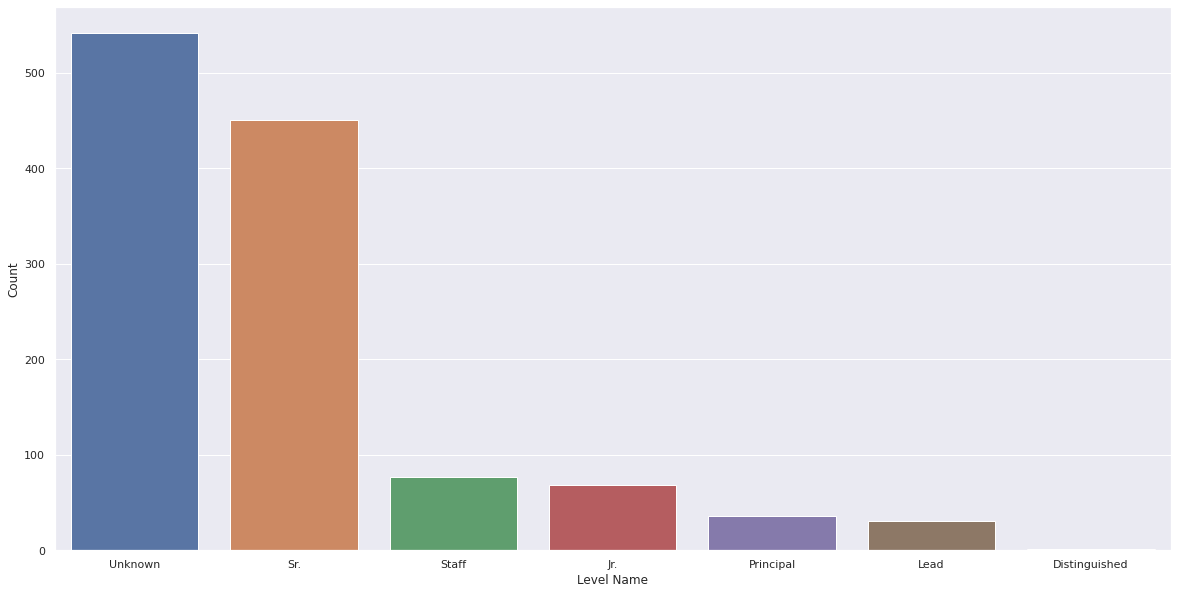

In [28]:
level_count = pd.DataFrame()
level_count = df_staff.loc[:,'Levels'].value_counts()
level_count = level_count.to_frame()
level_count['Level Name'] = level_count.index
level_count = level_count.rename(columns = {'Levels' : 'Count'})

plt.figure(figsize=(20, 10))
sns.set(font_scale = 1)
sns.barplot(data = level_count, x = 'Level Name', y = 'Count')
plt.show()

- The majority of levels are `Unknown`, which will then be predicted.
- Except `Unknown`, the level `Sr.` is the most common experience level for our dataset by a significant margin.

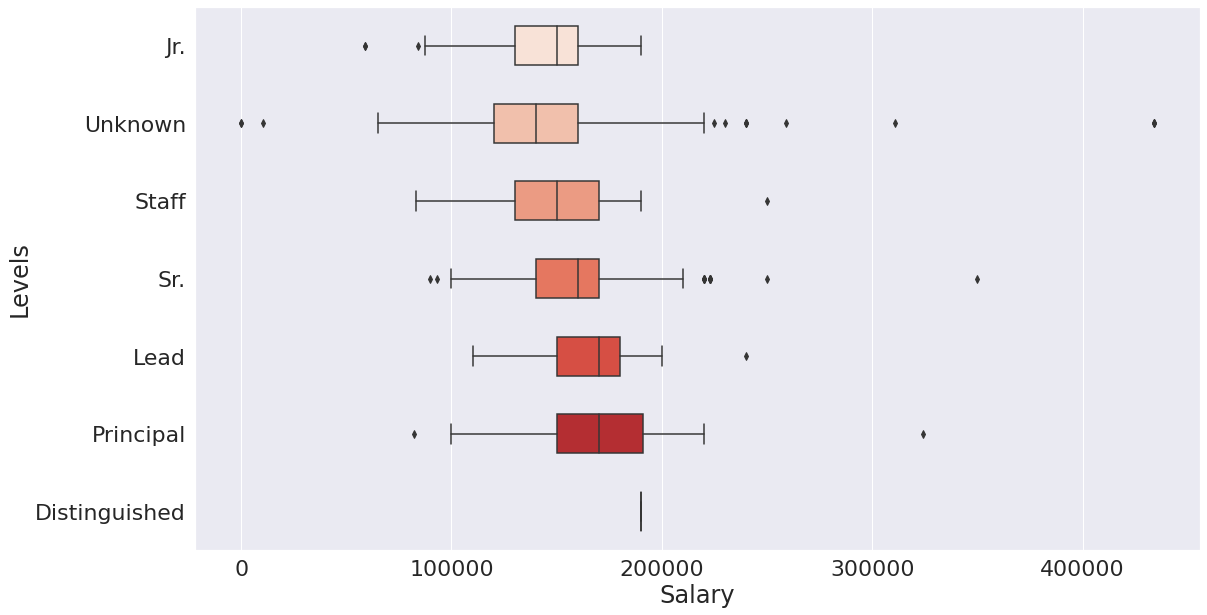

In [29]:
plt.figure(figsize=(18, 10))
sns.set(font_scale = 2)
sns.boxplot(y = 'Levels', x = 'Salary', data = df_staff, width = 0.5, palette="Reds")
plt.show()

6. Visualisation for **`Salary`**

<AxesSubplot:>

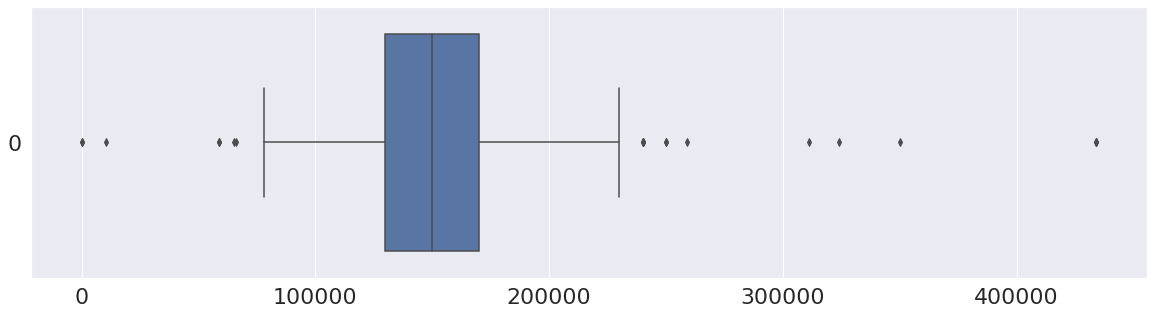

In [30]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = df_staff["Salary"], orient = "h")

- The vast majority of data points fall within `[130000, 170000]`, and mean is `150000`.
- However, there are 12 outliers which deviate significantly from the mean.

7. Visualisation for **`Skills`**

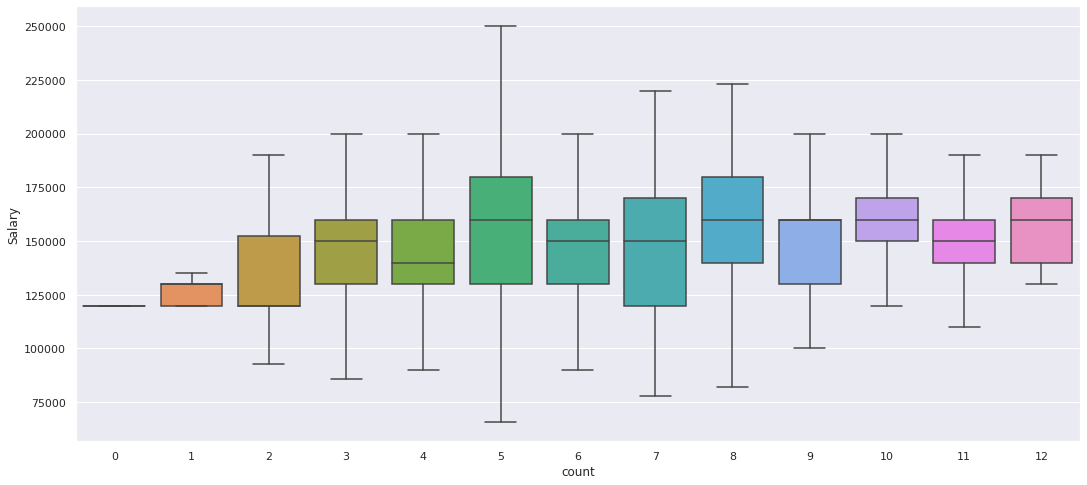

In [31]:
df_factors = df_staff
df_factors['count'] = df_factors.iloc[:,6:].sum(axis=1)
plt.figure(figsize=(18, 8))
sns.set(font_scale = 1)
sns.boxplot(x = "count", y = "Salary", data=df_factors, showfliers = False)
plt.show()

- Overall, with the increase of the count of skills, the salary of workers increases.

---

## 5. Preparation for Machine Learning

1. Drop the **`Company`** and **`City`** which are not suitable predictors for our model.

In [32]:
df = df_staff
df = df.drop(columns = ['Company', 'City'])
df.head(5)

,Job_ID,Title,Salary,Levels,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,...,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking,count
0,0,Data Scientist,110000,Jr.,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,1,Data Analyst,120000,Unknown,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,5
2,2,Data Scientist,150000,Staff,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7
3,3,Data Scientist,150000,Unknown,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,4,Data Scientist,130000,Jr.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


2. Convert the **`Title`** and **`Levels`** from object to numeric data.

In [33]:
def change_obj_cols(se):
    value = se.unique().tolist()
    return se.map(pd.Series(range(len(value)), index = value)).values

for col in ['Title', 'Levels']:
    df[col] = change_obj_cols(df[col])

In [34]:
df.head(5)

,Job_ID,Title,Salary,Levels,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,...,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking,count
0,0,0,110000,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,1,1,120000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,5
2,2,0,150000,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7
3,3,0,150000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,4,0,130000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


3. Split the whole dataset into **`train`** and **`test`** datasets with the ratio 8 : 2.

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = False)

4. Save the tables into excel files.

In [36]:
train.to_excel('train.xlsx', index = False)
test.to_excel('test.xlsx', index = False)

---

## 6. Machine Learning Models

#### 1. Regression Tree

- Regression tree is a model which accepts categorial data as inputs and predicts a numeric output.

In [37]:
# import regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
# import train/test set
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

# split sets into predictor and reponse sets
train_X = train.drop(columns = ['Job_ID','Salary','count'])
train_y = pd.DataFrame(train['Salary'])

test_X = test.drop(columns = ['Job_ID','Salary','count'])
test_y = pd.DataFrame(test['Salary'])

[Text(0.5959821428571429, 0.9285714285714286, 'Levels <= 1.5\nsquared_error = 1140854963.451\nsamples = 964\nvalue = 150626.604'),
 Text(0.3125, 0.7857142857142857, 'Title <= 1.5\nsquared_error = 1307926686.717\nsamples = 486\nvalue = 140363.817'),
 Text(0.20982142857142858, 0.6428571428571429, 'Title <= 0.5\nsquared_error = 594421596.99\nsamples = 288\nvalue = 128730.816'),
 Text(0.13392857142857142, 0.5, 'Scripting <= 0.5\nsquared_error = 529581831.253\nsamples = 278\nvalue = 129960.701'),
 Text(0.07142857142857142, 0.35714285714285715, "Bachelor's degree <= 0.5\nsquared_error = 407972272.058\nsamples = 272\nvalue = 130856.893"),
 Text(0.03571428571428571, 0.21428571428571427, 'Doctoral degree <= 0.5\nsquared_error = 281063315.215\nsamples = 159\nvalue = 135907.893'),
 Text(0.017857142857142856, 0.07142857142857142, 'squared_error = 258130312.428\nsamples = 103\nvalue = 132547.136'),
 Text(0.05357142857142857, 0.07142857142857142, 'squared_error = 264259885.204\nsamples = 56\nvalue =

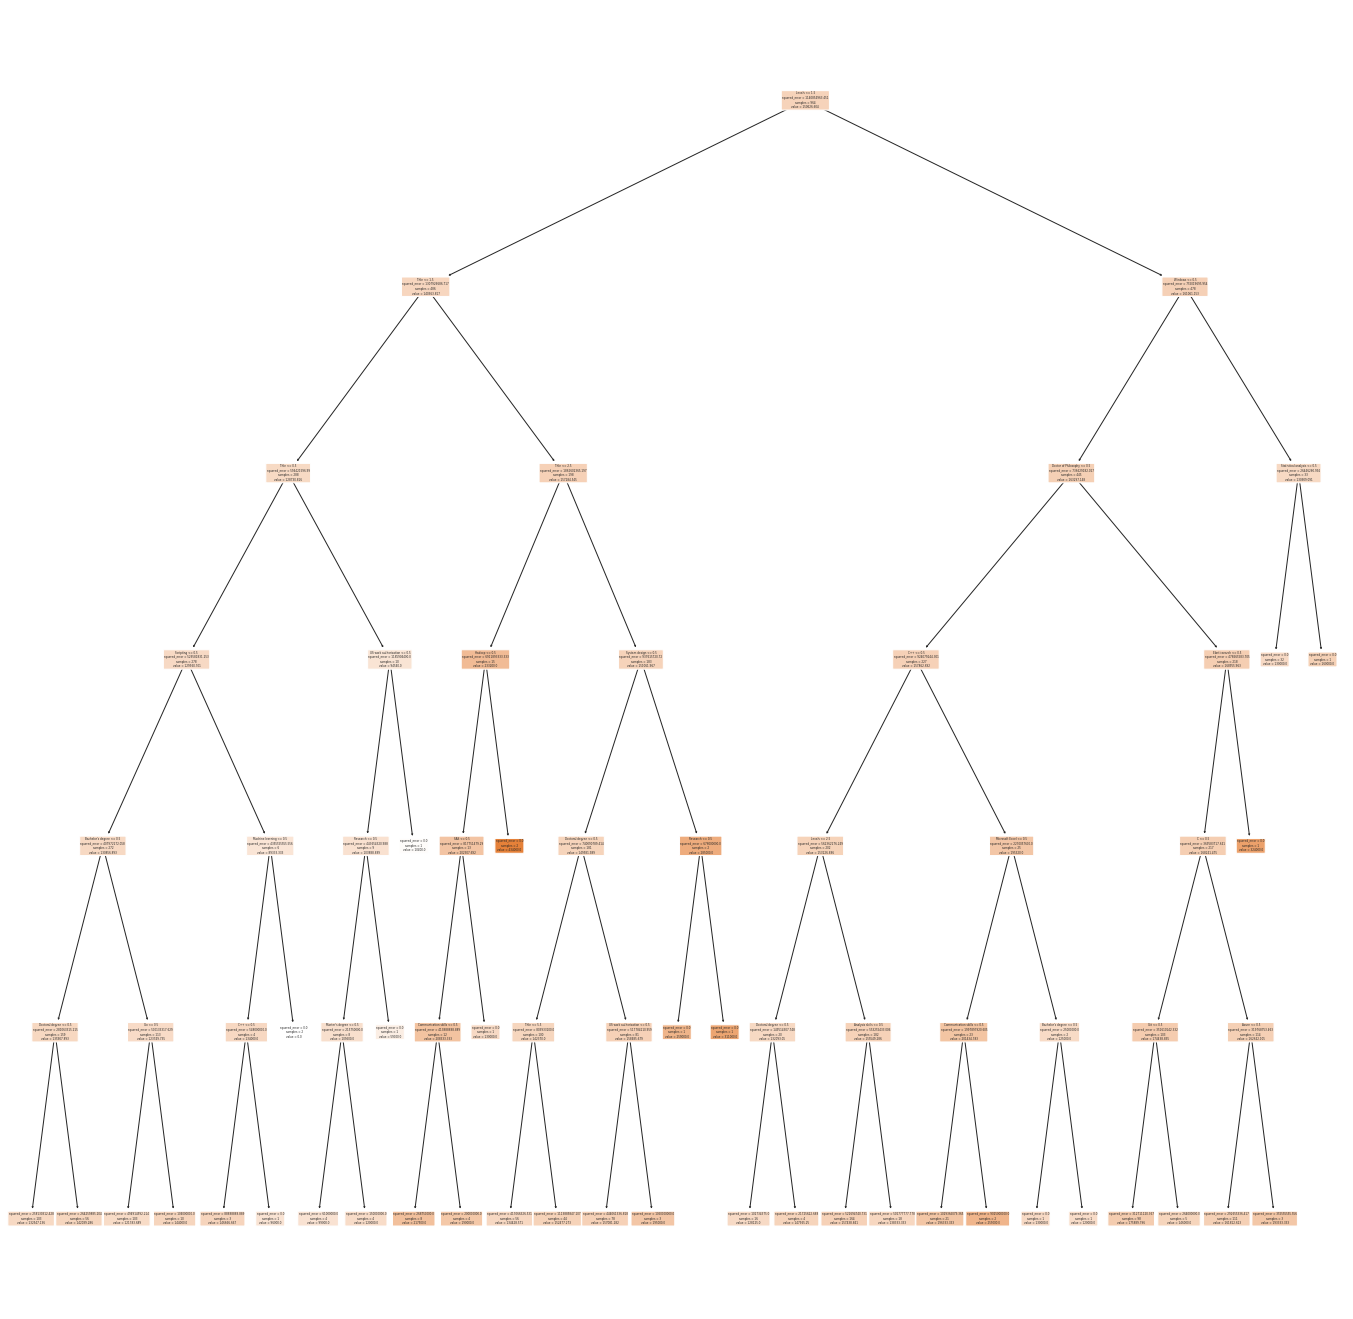

In [39]:
# create and fit regression tree
dectree = DecisionTreeRegressor(max_depth = 6)
dectree.fit(train_X, train_y)

# plot the trained decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, 
          filled=True, 
          rounded=True,
          feature_names= test_X.columns)

In [40]:
# predict test_y
test_y_pred = dectree.predict(test_X)

# evaluate prediction
mse = np.mean(np.square(np.array(test_y) - np.array(test_y_pred)))
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) \t:", rmse)
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(test_y, test_y_pred))

Root Mean Squared Error (RMSE) 	: 47643.784472208965
Mean Absolute Error (MAE) 	: 17570.194874127


In [41]:
# goodness of fit on train set
print('R^2(train) \t: ', dectree.score(train_X, train_y))

# goodness of fit on test set
print('R^2(test) \t: ', dectree.score(test_X, test_y))

R^2(train) 	:  0.6278336401286195
R^2(test) 	:  0.1659114203214781


- Regression Tree performs not quite good in the test set, as it overfits the train set.

#### 2. Neural Network

- Neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

- Neural networks are flexible and can be used for both classification and regression. So we want to dicover whether it will be better for our prediction.

In [42]:
# import tensorflow package
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense


2022-03-31 12:35:04.652882: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2022-03-31 12:35:04.652960: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2022-03-31 12:35:04.652966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [43]:
# import the train/test set
train = pd.read_excel('train.xlsx')
train = train.drop(['Job_ID'], axis = 1)

test = pd.read_excel('test.xlsx')
test = test.drop(['Job_ID'], axis = 1)

train_features = train.copy()
test_features = test.copy()

train_target = train_features.pop('Salary')
test_target = test_features.pop('Salary')

In [44]:
# set gpu devices for training
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices(gpu_devices[2:3], 'GPU')

2022-03-31 12:35:05.629319: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-03-31 12:35:05.743360: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:19:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-31 12:35:05.744042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 1 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-31 12:35:05.744682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 2 with properties: 
pciBusID: 0000:67:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBan

- We set a very standard neural network with 1 input layer, 3 hidden layers, and 1 output layer.

In [45]:
# set the NN_model
NN_model = Sequential()

# the input layer 
NN_model.add(Dense(67, kernel_initializer='normal',input_dim = train_features.shape[1], activation='relu'))

# The hidden layers 
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# the output layer 
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

2022-03-31 12:35:05.777278: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-03-31 12:35:05.791103: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3300000000 Hz
2022-03-31 12:35:05.792655: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5564f73363a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-31 12:35:05.792681: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-31 12:35:05.906607: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5564f7193990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-03-31 12:35:05.906653: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2022-03-31 12:35:05.908597: I 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 67)                4556      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               17408     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 153,805
Trainable params: 153,805
Non-trainable params: 0
_________________________________________________________________


In [46]:
# train the model with the train set
NN_model.fit(train_features, train_target, epochs=1500, batch_size=8192, validation_split = 0.2)

Train on 771 samples, validate on 193 samples
Epoch 1/1500


2022-03-31 12:35:06.638450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


771/771 [==============================] - 0s 601us/sample - loss: 149785.2969 - mean_absolute_error: 149785.2969 - val_loss: 153987.2812 - val_mean_absolute_error: 153987.2812
Epoch 2/1500
771/771 [==============================] - 0s 13us/sample - loss: 149785.1875 - mean_absolute_error: 149785.1875 - val_loss: 153987.1719 - val_mean_absolute_error: 153987.1719
Epoch 3/1500
771/771 [==============================] - 0s 13us/sample - loss: 149785.0938 - mean_absolute_error: 149785.0938 - val_loss: 153987.0469 - val_mean_absolute_error: 153987.0469
Epoch 4/1500
771/771 [==============================] - 0s 14us/sample - loss: 149784.9531 - mean_absolute_error: 149784.9531 - val_loss: 153986.8594 - val_mean_absolute_error: 153986.8594
Epoch 5/1500
771/771 [==============================] - 0s 17us/sample - loss: 149784.7812 - mean_absolute_error: 149784.7812 - val_loss: 153986.6094 - val_mean_absolute_error: 153986.6094
Epoch 6/1500
771/771 [==============================] - 0s 18us/sam

Epoch 45/1500
771/771 [==============================] - 0s 20us/sample - loss: 147423.8438 - mean_absolute_error: 147423.8438 - val_loss: 151142.0625 - val_mean_absolute_error: 151142.0625
Epoch 46/1500
771/771 [==============================] - 0s 20us/sample - loss: 147078.4531 - mean_absolute_error: 147078.4531 - val_loss: 150732.9062 - val_mean_absolute_error: 150732.9062
Epoch 47/1500
771/771 [==============================] - 0s 20us/sample - loss: 146689.1875 - mean_absolute_error: 146689.1875 - val_loss: 150272.6875 - val_mean_absolute_error: 150272.6875
Epoch 48/1500
771/771 [==============================] - 0s 20us/sample - loss: 146251.3750 - mean_absolute_error: 146251.3750 - val_loss: 149756.0469 - val_mean_absolute_error: 149756.0469
Epoch 49/1500
771/771 [==============================] - 0s 21us/sample - loss: 145759.9375 - mean_absolute_error: 145759.9375 - val_loss: 149176.9688 - val_mean_absolute_error: 149176.9688
Epoch 50/1500
771/771 [===========================

Epoch 89/1500
771/771 [==============================] - 0s 20us/sample - loss: 49002.9219 - mean_absolute_error: 49002.9219 - val_loss: 49384.1758 - val_mean_absolute_error: 49384.1758
Epoch 90/1500
771/771 [==============================] - 0s 21us/sample - loss: 49370.7656 - mean_absolute_error: 49370.7656 - val_loss: 49006.8359 - val_mean_absolute_error: 49006.8359
Epoch 91/1500
771/771 [==============================] - 0s 21us/sample - loss: 49069.5078 - mean_absolute_error: 49069.5078 - val_loss: 47958.3828 - val_mean_absolute_error: 47958.3828
Epoch 92/1500
771/771 [==============================] - 0s 21us/sample - loss: 48209.6914 - mean_absolute_error: 48209.6914 - val_loss: 46426.9727 - val_mean_absolute_error: 46426.9727
Epoch 93/1500
771/771 [==============================] - 0s 24us/sample - loss: 46949.9141 - mean_absolute_error: 46949.9141 - val_loss: 44654.9258 - val_mean_absolute_error: 44654.9258
Epoch 94/1500
771/771 [==============================] - 0s 21us/sampl

Epoch 133/1500
771/771 [==============================] - 0s 21us/sample - loss: 35716.1250 - mean_absolute_error: 35716.1250 - val_loss: 32242.3828 - val_mean_absolute_error: 32242.3828
Epoch 134/1500
771/771 [==============================] - 0s 20us/sample - loss: 35594.6484 - mean_absolute_error: 35594.6484 - val_loss: 32128.6738 - val_mean_absolute_error: 32128.6738
Epoch 135/1500
771/771 [==============================] - 0s 21us/sample - loss: 35475.3516 - mean_absolute_error: 35475.3516 - val_loss: 31998.0176 - val_mean_absolute_error: 31998.0176
Epoch 136/1500
771/771 [==============================] - 0s 21us/sample - loss: 35352.9258 - mean_absolute_error: 35352.9258 - val_loss: 31848.7383 - val_mean_absolute_error: 31848.7383
Epoch 137/1500
771/771 [==============================] - 0s 21us/sample - loss: 35229.7500 - mean_absolute_error: 35229.7500 - val_loss: 31679.6934 - val_mean_absolute_error: 31679.6934
Epoch 138/1500
771/771 [==============================] - 0s 21us

Epoch 177/1500
771/771 [==============================] - 0s 19us/sample - loss: 31062.1660 - mean_absolute_error: 31062.1660 - val_loss: 26310.7402 - val_mean_absolute_error: 26310.7402
Epoch 178/1500
771/771 [==============================] - 0s 20us/sample - loss: 30985.5000 - mean_absolute_error: 30985.5000 - val_loss: 26214.9219 - val_mean_absolute_error: 26214.9219
Epoch 179/1500
771/771 [==============================] - 0s 21us/sample - loss: 30908.1133 - mean_absolute_error: 30908.1133 - val_loss: 26118.2559 - val_mean_absolute_error: 26118.2559
Epoch 180/1500
771/771 [==============================] - 0s 22us/sample - loss: 30830.4023 - mean_absolute_error: 30830.4023 - val_loss: 26021.4043 - val_mean_absolute_error: 26021.4043
Epoch 181/1500
771/771 [==============================] - 0s 20us/sample - loss: 30752.5742 - mean_absolute_error: 30752.5742 - val_loss: 25926.0078 - val_mean_absolute_error: 25926.0078
Epoch 182/1500
771/771 [==============================] - 0s 20us

Epoch 221/1500
771/771 [==============================] - 0s 22us/sample - loss: 28069.1074 - mean_absolute_error: 28069.1074 - val_loss: 22463.3555 - val_mean_absolute_error: 22463.3555
Epoch 222/1500
771/771 [==============================] - 0s 21us/sample - loss: 28009.3047 - mean_absolute_error: 28009.3047 - val_loss: 22382.3711 - val_mean_absolute_error: 22382.3711
Epoch 223/1500
771/771 [==============================] - 0s 22us/sample - loss: 27946.4531 - mean_absolute_error: 27946.4531 - val_loss: 22307.6992 - val_mean_absolute_error: 22307.6992
Epoch 224/1500
771/771 [==============================] - 0s 22us/sample - loss: 27887.4648 - mean_absolute_error: 27887.4648 - val_loss: 22231.9473 - val_mean_absolute_error: 22231.9473
Epoch 225/1500
771/771 [==============================] - 0s 22us/sample - loss: 27830.8438 - mean_absolute_error: 27830.8438 - val_loss: 22151.3125 - val_mean_absolute_error: 22151.3125
Epoch 226/1500
771/771 [==============================] - 0s 22us

Epoch 265/1500
771/771 [==============================] - 0s 22us/sample - loss: 26151.8965 - mean_absolute_error: 26151.8965 - val_loss: 20636.6367 - val_mean_absolute_error: 20636.6367
Epoch 266/1500
771/771 [==============================] - 0s 23us/sample - loss: 26121.8633 - mean_absolute_error: 26121.8633 - val_loss: 20612.3262 - val_mean_absolute_error: 20612.3262
Epoch 267/1500
771/771 [==============================] - 0s 23us/sample - loss: 26083.7012 - mean_absolute_error: 26083.7012 - val_loss: 20595.5703 - val_mean_absolute_error: 20595.5703
Epoch 268/1500
771/771 [==============================] - 0s 21us/sample - loss: 26057.1875 - mean_absolute_error: 26057.1875 - val_loss: 20567.6992 - val_mean_absolute_error: 20567.6992
Epoch 269/1500
771/771 [==============================] - 0s 20us/sample - loss: 26025.9590 - mean_absolute_error: 26025.9590 - val_loss: 20551.3633 - val_mean_absolute_error: 20551.3633
Epoch 270/1500
771/771 [==============================] - 0s 20us

Epoch 309/1500
771/771 [==============================] - 0s 21us/sample - loss: 24994.9180 - mean_absolute_error: 24994.9180 - val_loss: 19817.9980 - val_mean_absolute_error: 19817.9980
Epoch 310/1500
771/771 [==============================] - 0s 21us/sample - loss: 24972.6348 - mean_absolute_error: 24972.6348 - val_loss: 19788.1836 - val_mean_absolute_error: 19788.1836
Epoch 311/1500
771/771 [==============================] - 0s 21us/sample - loss: 24946.8281 - mean_absolute_error: 24946.8281 - val_loss: 19795.1055 - val_mean_absolute_error: 19795.1055
Epoch 312/1500
771/771 [==============================] - 0s 21us/sample - loss: 24937.2520 - mean_absolute_error: 24937.2520 - val_loss: 19791.9746 - val_mean_absolute_error: 19791.9746
Epoch 313/1500
771/771 [==============================] - 0s 21us/sample - loss: 24920.4512 - mean_absolute_error: 24920.4512 - val_loss: 19796.7930 - val_mean_absolute_error: 19796.7930
Epoch 314/1500
771/771 [==============================] - 0s 21us

Epoch 353/1500
771/771 [==============================] - 0s 20us/sample - loss: 24259.4531 - mean_absolute_error: 24259.4531 - val_loss: 19295.5020 - val_mean_absolute_error: 19295.5020
Epoch 354/1500
771/771 [==============================] - 0s 20us/sample - loss: 24259.4395 - mean_absolute_error: 24259.4395 - val_loss: 19285.8105 - val_mean_absolute_error: 19285.8105
Epoch 355/1500
771/771 [==============================] - 0s 20us/sample - loss: 24254.3262 - mean_absolute_error: 24254.3262 - val_loss: 19275.1602 - val_mean_absolute_error: 19275.1602
Epoch 356/1500
771/771 [==============================] - 0s 20us/sample - loss: 24210.6426 - mean_absolute_error: 24210.6426 - val_loss: 19347.2148 - val_mean_absolute_error: 19347.2148
Epoch 357/1500
771/771 [==============================] - 0s 20us/sample - loss: 24206.5508 - mean_absolute_error: 24206.5508 - val_loss: 19280.3750 - val_mean_absolute_error: 19280.3750
Epoch 358/1500
771/771 [==============================] - 0s 20us

Epoch 397/1500
771/771 [==============================] - 0s 21us/sample - loss: 23654.4531 - mean_absolute_error: 23654.4531 - val_loss: 18870.7031 - val_mean_absolute_error: 18870.7031
Epoch 398/1500
771/771 [==============================] - 0s 20us/sample - loss: 23601.5918 - mean_absolute_error: 23601.5918 - val_loss: 18863.4199 - val_mean_absolute_error: 18863.4199
Epoch 399/1500
771/771 [==============================] - 0s 20us/sample - loss: 23603.0430 - mean_absolute_error: 23603.0430 - val_loss: 18845.8945 - val_mean_absolute_error: 18845.8945
Epoch 400/1500
771/771 [==============================] - 0s 20us/sample - loss: 23575.4727 - mean_absolute_error: 23575.4727 - val_loss: 18951.2559 - val_mean_absolute_error: 18951.2559
Epoch 401/1500
771/771 [==============================] - 0s 21us/sample - loss: 23592.2598 - mean_absolute_error: 23592.2598 - val_loss: 18836.6094 - val_mean_absolute_error: 18836.6094
Epoch 402/1500
771/771 [==============================] - 0s 20us

Epoch 441/1500
771/771 [==============================] - 0s 20us/sample - loss: 23040.5508 - mean_absolute_error: 23040.5508 - val_loss: 18420.7637 - val_mean_absolute_error: 18420.7637
Epoch 442/1500
771/771 [==============================] - 0s 21us/sample - loss: 22998.2129 - mean_absolute_error: 22998.2129 - val_loss: 18434.9512 - val_mean_absolute_error: 18434.9512
Epoch 443/1500
771/771 [==============================] - 0s 20us/sample - loss: 22946.6641 - mean_absolute_error: 22946.6641 - val_loss: 18490.6797 - val_mean_absolute_error: 18490.6797
Epoch 444/1500
771/771 [==============================] - 0s 21us/sample - loss: 22954.7422 - mean_absolute_error: 22954.7422 - val_loss: 18364.2129 - val_mean_absolute_error: 18364.2129
Epoch 445/1500
771/771 [==============================] - 0s 20us/sample - loss: 22905.5508 - mean_absolute_error: 22905.5508 - val_loss: 18361.4180 - val_mean_absolute_error: 18361.4180
Epoch 446/1500
771/771 [==============================] - 0s 20us

Epoch 485/1500
771/771 [==============================] - 0s 21us/sample - loss: 22300.9023 - mean_absolute_error: 22300.9023 - val_loss: 17795.3262 - val_mean_absolute_error: 17795.3262
Epoch 486/1500
771/771 [==============================] - 0s 21us/sample - loss: 22283.9746 - mean_absolute_error: 22283.9746 - val_loss: 17853.9941 - val_mean_absolute_error: 17853.9941
Epoch 487/1500
771/771 [==============================] - 0s 21us/sample - loss: 22288.8320 - mean_absolute_error: 22288.8320 - val_loss: 17835.9453 - val_mean_absolute_error: 17835.9453
Epoch 488/1500
771/771 [==============================] - 0s 21us/sample - loss: 22271.4238 - mean_absolute_error: 22271.4238 - val_loss: 17751.0840 - val_mean_absolute_error: 17751.0840
Epoch 489/1500
771/771 [==============================] - 0s 21us/sample - loss: 22232.4434 - mean_absolute_error: 22232.4434 - val_loss: 17731.3340 - val_mean_absolute_error: 17731.3340
Epoch 490/1500
771/771 [==============================] - 0s 21us

Epoch 529/1500
771/771 [==============================] - 0s 20us/sample - loss: 21644.2734 - mean_absolute_error: 21644.2734 - val_loss: 17240.2930 - val_mean_absolute_error: 17240.2930
Epoch 530/1500
771/771 [==============================] - 0s 20us/sample - loss: 21614.5820 - mean_absolute_error: 21614.5820 - val_loss: 17219.3848 - val_mean_absolute_error: 17219.3848
Epoch 531/1500
771/771 [==============================] - 0s 20us/sample - loss: 21538.7480 - mean_absolute_error: 21538.7480 - val_loss: 17316.5410 - val_mean_absolute_error: 17316.5410
Epoch 532/1500
771/771 [==============================] - 0s 20us/sample - loss: 21557.4023 - mean_absolute_error: 21557.4023 - val_loss: 17205.1094 - val_mean_absolute_error: 17205.1094
Epoch 533/1500
771/771 [==============================] - 0s 20us/sample - loss: 21505.0117 - mean_absolute_error: 21505.0117 - val_loss: 17200.9902 - val_mean_absolute_error: 17200.9902
Epoch 534/1500
771/771 [==============================] - 0s 20us

Epoch 573/1500
771/771 [==============================] - 0s 21us/sample - loss: 20800.6465 - mean_absolute_error: 20800.6465 - val_loss: 16735.0215 - val_mean_absolute_error: 16735.0215
Epoch 574/1500
771/771 [==============================] - 0s 21us/sample - loss: 20768.0938 - mean_absolute_error: 20768.0938 - val_loss: 16854.5410 - val_mean_absolute_error: 16854.5410
Epoch 575/1500
771/771 [==============================] - 0s 21us/sample - loss: 20790.4375 - mean_absolute_error: 20790.4375 - val_loss: 16763.7461 - val_mean_absolute_error: 16763.7461
Epoch 576/1500
771/771 [==============================] - 0s 21us/sample - loss: 20736.0723 - mean_absolute_error: 20736.0723 - val_loss: 16737.2988 - val_mean_absolute_error: 16737.2988
Epoch 577/1500
771/771 [==============================] - 0s 21us/sample - loss: 20759.6191 - mean_absolute_error: 20759.6191 - val_loss: 16719.4141 - val_mean_absolute_error: 16719.4141
Epoch 578/1500
771/771 [==============================] - 0s 21us

Epoch 617/1500
771/771 [==============================] - 0s 21us/sample - loss: 19989.3828 - mean_absolute_error: 19989.3828 - val_loss: 16376.5986 - val_mean_absolute_error: 16376.5986
Epoch 618/1500
771/771 [==============================] - 0s 21us/sample - loss: 19985.9102 - mean_absolute_error: 19985.9102 - val_loss: 16313.4736 - val_mean_absolute_error: 16313.4736
Epoch 619/1500
771/771 [==============================] - 0s 21us/sample - loss: 19959.9434 - mean_absolute_error: 19959.9434 - val_loss: 16295.7656 - val_mean_absolute_error: 16295.7656
Epoch 620/1500
771/771 [==============================] - 0s 21us/sample - loss: 19959.9824 - mean_absolute_error: 19959.9824 - val_loss: 16302.2627 - val_mean_absolute_error: 16302.2627
Epoch 621/1500
771/771 [==============================] - 0s 21us/sample - loss: 19923.0840 - mean_absolute_error: 19923.0840 - val_loss: 16328.1348 - val_mean_absolute_error: 16328.1348
Epoch 622/1500
771/771 [==============================] - 0s 21us

Epoch 661/1500
771/771 [==============================] - 0s 20us/sample - loss: 19196.4863 - mean_absolute_error: 19196.4863 - val_loss: 15831.6953 - val_mean_absolute_error: 15831.6953
Epoch 662/1500
771/771 [==============================] - 0s 21us/sample - loss: 19181.1484 - mean_absolute_error: 19181.1484 - val_loss: 15794.3848 - val_mean_absolute_error: 15794.3848
Epoch 663/1500
771/771 [==============================] - 0s 20us/sample - loss: 19174.0391 - mean_absolute_error: 19174.0391 - val_loss: 15792.8740 - val_mean_absolute_error: 15792.8740
Epoch 664/1500
771/771 [==============================] - 0s 21us/sample - loss: 19136.1680 - mean_absolute_error: 19136.1680 - val_loss: 15822.5664 - val_mean_absolute_error: 15822.5664
Epoch 665/1500
771/771 [==============================] - 0s 21us/sample - loss: 19097.9102 - mean_absolute_error: 19097.9102 - val_loss: 15788.5840 - val_mean_absolute_error: 15788.5840
Epoch 666/1500
771/771 [==============================] - 0s 21us

Epoch 705/1500
771/771 [==============================] - 0s 21us/sample - loss: 18359.1074 - mean_absolute_error: 18359.1074 - val_loss: 15338.7930 - val_mean_absolute_error: 15338.7930
Epoch 706/1500
771/771 [==============================] - 0s 20us/sample - loss: 18337.7207 - mean_absolute_error: 18337.7207 - val_loss: 15366.6973 - val_mean_absolute_error: 15366.6973
Epoch 707/1500
771/771 [==============================] - 0s 20us/sample - loss: 18320.6895 - mean_absolute_error: 18320.6895 - val_loss: 15360.4238 - val_mean_absolute_error: 15360.4238
Epoch 708/1500
771/771 [==============================] - 0s 20us/sample - loss: 18323.6895 - mean_absolute_error: 18323.6895 - val_loss: 15376.3838 - val_mean_absolute_error: 15376.3838
Epoch 709/1500
771/771 [==============================] - 0s 20us/sample - loss: 18298.7500 - mean_absolute_error: 18298.7500 - val_loss: 15339.9092 - val_mean_absolute_error: 15339.9092
Epoch 710/1500
771/771 [==============================] - 0s 20us

Epoch 749/1500
771/771 [==============================] - 0s 21us/sample - loss: 17727.1309 - mean_absolute_error: 17727.1309 - val_loss: 15228.7412 - val_mean_absolute_error: 15228.7412
Epoch 750/1500
771/771 [==============================] - 0s 20us/sample - loss: 17708.2559 - mean_absolute_error: 17708.2559 - val_loss: 15262.8418 - val_mean_absolute_error: 15262.8418
Epoch 751/1500
771/771 [==============================] - 0s 21us/sample - loss: 17708.0371 - mean_absolute_error: 17708.0371 - val_loss: 15223.4512 - val_mean_absolute_error: 15223.4512
Epoch 752/1500
771/771 [==============================] - 0s 20us/sample - loss: 17738.5254 - mean_absolute_error: 17738.5254 - val_loss: 15211.0566 - val_mean_absolute_error: 15211.0566
Epoch 753/1500
771/771 [==============================] - 0s 21us/sample - loss: 17678.9082 - mean_absolute_error: 17678.9082 - val_loss: 15392.1982 - val_mean_absolute_error: 15392.1982
Epoch 754/1500
771/771 [==============================] - 0s 21us

Epoch 793/1500
771/771 [==============================] - 0s 22us/sample - loss: 17235.8926 - mean_absolute_error: 17235.8926 - val_loss: 15334.1748 - val_mean_absolute_error: 15334.1748
Epoch 794/1500
771/771 [==============================] - 0s 22us/sample - loss: 17259.6914 - mean_absolute_error: 17259.6914 - val_loss: 15194.8135 - val_mean_absolute_error: 15194.8135
Epoch 795/1500
771/771 [==============================] - 0s 21us/sample - loss: 17188.5547 - mean_absolute_error: 17188.5547 - val_loss: 15210.2139 - val_mean_absolute_error: 15210.2139
Epoch 796/1500
771/771 [==============================] - 0s 21us/sample - loss: 17238.7891 - mean_absolute_error: 17238.7891 - val_loss: 15176.3955 - val_mean_absolute_error: 15176.3955
Epoch 797/1500
771/771 [==============================] - 0s 21us/sample - loss: 17167.5703 - mean_absolute_error: 17167.5703 - val_loss: 15257.8262 - val_mean_absolute_error: 15257.8262
Epoch 798/1500
771/771 [==============================] - 0s 21us

Epoch 837/1500
771/771 [==============================] - 0s 21us/sample - loss: 16808.7188 - mean_absolute_error: 16808.7188 - val_loss: 15014.0703 - val_mean_absolute_error: 15014.0703
Epoch 838/1500
771/771 [==============================] - 0s 21us/sample - loss: 16799.1094 - mean_absolute_error: 16799.1094 - val_loss: 14996.0449 - val_mean_absolute_error: 14996.0449
Epoch 839/1500
771/771 [==============================] - 0s 21us/sample - loss: 16793.7148 - mean_absolute_error: 16793.7148 - val_loss: 15190.7656 - val_mean_absolute_error: 15190.7656
Epoch 840/1500
771/771 [==============================] - 0s 21us/sample - loss: 16868.0566 - mean_absolute_error: 16868.0566 - val_loss: 15026.5225 - val_mean_absolute_error: 15026.5225
Epoch 841/1500
771/771 [==============================] - 0s 21us/sample - loss: 16785.8438 - mean_absolute_error: 16785.8438 - val_loss: 15063.6982 - val_mean_absolute_error: 15063.6982
Epoch 842/1500
771/771 [==============================] - 0s 21us

Epoch 881/1500
771/771 [==============================] - 0s 21us/sample - loss: 16545.0293 - mean_absolute_error: 16545.0293 - val_loss: 14809.6455 - val_mean_absolute_error: 14809.6455
Epoch 882/1500
771/771 [==============================] - 0s 21us/sample - loss: 16543.3184 - mean_absolute_error: 16543.3184 - val_loss: 14846.2607 - val_mean_absolute_error: 14846.2607
Epoch 883/1500
771/771 [==============================] - 0s 21us/sample - loss: 16603.3203 - mean_absolute_error: 16603.3203 - val_loss: 14818.7539 - val_mean_absolute_error: 14818.7539
Epoch 884/1500
771/771 [==============================] - 0s 21us/sample - loss: 16544.8125 - mean_absolute_error: 16544.8125 - val_loss: 14872.0713 - val_mean_absolute_error: 14872.0713
Epoch 885/1500
771/771 [==============================] - 0s 21us/sample - loss: 16558.5879 - mean_absolute_error: 16558.5879 - val_loss: 14819.8057 - val_mean_absolute_error: 14819.8057
Epoch 886/1500
771/771 [==============================] - 0s 21us

Epoch 925/1500
771/771 [==============================] - 0s 22us/sample - loss: 16361.6885 - mean_absolute_error: 16361.6885 - val_loss: 14560.9814 - val_mean_absolute_error: 14560.9814
Epoch 926/1500
771/771 [==============================] - 0s 21us/sample - loss: 16343.1436 - mean_absolute_error: 16343.1436 - val_loss: 14619.9814 - val_mean_absolute_error: 14619.9814
Epoch 927/1500
771/771 [==============================] - 0s 22us/sample - loss: 16363.3242 - mean_absolute_error: 16363.3242 - val_loss: 14544.3223 - val_mean_absolute_error: 14544.3223
Epoch 928/1500
771/771 [==============================] - 0s 21us/sample - loss: 16342.3232 - mean_absolute_error: 16342.3232 - val_loss: 14521.9844 - val_mean_absolute_error: 14521.9844
Epoch 929/1500
771/771 [==============================] - 0s 21us/sample - loss: 16331.3887 - mean_absolute_error: 16331.3887 - val_loss: 14561.7266 - val_mean_absolute_error: 14561.7266
Epoch 930/1500
771/771 [==============================] - 0s 21us

Epoch 969/1500
771/771 [==============================] - 0s 21us/sample - loss: 16251.0605 - mean_absolute_error: 16251.0605 - val_loss: 14602.9512 - val_mean_absolute_error: 14602.9512
Epoch 970/1500
771/771 [==============================] - 0s 21us/sample - loss: 16211.4971 - mean_absolute_error: 16211.4971 - val_loss: 14489.1826 - val_mean_absolute_error: 14489.1826
Epoch 971/1500
771/771 [==============================] - 0s 21us/sample - loss: 16218.9795 - mean_absolute_error: 16218.9795 - val_loss: 14459.0410 - val_mean_absolute_error: 14459.0410
Epoch 972/1500
771/771 [==============================] - 0s 20us/sample - loss: 16175.4395 - mean_absolute_error: 16175.4395 - val_loss: 14664.4961 - val_mean_absolute_error: 14664.4961
Epoch 973/1500
771/771 [==============================] - 0s 20us/sample - loss: 16236.6904 - mean_absolute_error: 16236.6904 - val_loss: 14591.3564 - val_mean_absolute_error: 14591.3564
Epoch 974/1500
771/771 [==============================] - 0s 21us

Epoch 1013/1500
771/771 [==============================] - 0s 21us/sample - loss: 15977.5654 - mean_absolute_error: 15977.5654 - val_loss: 14413.4717 - val_mean_absolute_error: 14413.4717
Epoch 1014/1500
771/771 [==============================] - 0s 21us/sample - loss: 15998.0508 - mean_absolute_error: 15998.0508 - val_loss: 14366.9814 - val_mean_absolute_error: 14366.9814
Epoch 1015/1500
771/771 [==============================] - 0s 21us/sample - loss: 16031.4863 - mean_absolute_error: 16031.4863 - val_loss: 14336.5752 - val_mean_absolute_error: 14336.5752
Epoch 1016/1500
771/771 [==============================] - 0s 20us/sample - loss: 15966.5010 - mean_absolute_error: 15966.5010 - val_loss: 14451.9551 - val_mean_absolute_error: 14451.9551
Epoch 1017/1500
771/771 [==============================] - 0s 21us/sample - loss: 16006.7266 - mean_absolute_error: 16006.7266 - val_loss: 14371.8184 - val_mean_absolute_error: 14371.8184
Epoch 1018/1500
771/771 [==============================] - 0

Epoch 1057/1500
771/771 [==============================] - 0s 21us/sample - loss: 15893.5781 - mean_absolute_error: 15893.5781 - val_loss: 14383.4561 - val_mean_absolute_error: 14383.4561
Epoch 1058/1500
771/771 [==============================] - 0s 21us/sample - loss: 15874.7832 - mean_absolute_error: 15874.7832 - val_loss: 14412.9668 - val_mean_absolute_error: 14412.9668
Epoch 1059/1500
771/771 [==============================] - 0s 20us/sample - loss: 15880.8496 - mean_absolute_error: 15880.8496 - val_loss: 14262.3174 - val_mean_absolute_error: 14262.3174
Epoch 1060/1500
771/771 [==============================] - 0s 21us/sample - loss: 15830.0527 - mean_absolute_error: 15830.0527 - val_loss: 14315.8652 - val_mean_absolute_error: 14315.8652
Epoch 1061/1500
771/771 [==============================] - 0s 21us/sample - loss: 15907.9922 - mean_absolute_error: 15907.9922 - val_loss: 14292.7656 - val_mean_absolute_error: 14292.7656
Epoch 1062/1500
771/771 [==============================] - 0

Epoch 1101/1500
771/771 [==============================] - 0s 20us/sample - loss: 15720.3633 - mean_absolute_error: 15720.3633 - val_loss: 14206.3975 - val_mean_absolute_error: 14206.3975
Epoch 1102/1500
771/771 [==============================] - 0s 21us/sample - loss: 15681.7822 - mean_absolute_error: 15681.7822 - val_loss: 14237.3320 - val_mean_absolute_error: 14237.3320
Epoch 1103/1500
771/771 [==============================] - 0s 20us/sample - loss: 15705.4785 - mean_absolute_error: 15705.4785 - val_loss: 14219.8535 - val_mean_absolute_error: 14219.8535
Epoch 1104/1500
771/771 [==============================] - 0s 20us/sample - loss: 15657.9414 - mean_absolute_error: 15657.9414 - val_loss: 14204.8467 - val_mean_absolute_error: 14204.8467
Epoch 1105/1500
771/771 [==============================] - 0s 20us/sample - loss: 15644.0146 - mean_absolute_error: 15644.0146 - val_loss: 14242.9766 - val_mean_absolute_error: 14242.9766
Epoch 1106/1500
771/771 [==============================] - 0

Epoch 1145/1500
771/771 [==============================] - 0s 21us/sample - loss: 15489.5098 - mean_absolute_error: 15489.5098 - val_loss: 14206.8486 - val_mean_absolute_error: 14206.8486
Epoch 1146/1500
771/771 [==============================] - 0s 20us/sample - loss: 15514.9697 - mean_absolute_error: 15514.9697 - val_loss: 14136.2578 - val_mean_absolute_error: 14136.2578
Epoch 1147/1500
771/771 [==============================] - 0s 21us/sample - loss: 15471.6611 - mean_absolute_error: 15471.6611 - val_loss: 14121.3525 - val_mean_absolute_error: 14121.3525
Epoch 1148/1500
771/771 [==============================] - 0s 21us/sample - loss: 15485.6240 - mean_absolute_error: 15485.6240 - val_loss: 14213.6025 - val_mean_absolute_error: 14213.6025
Epoch 1149/1500
771/771 [==============================] - 0s 21us/sample - loss: 15510.2773 - mean_absolute_error: 15510.2773 - val_loss: 14141.6104 - val_mean_absolute_error: 14141.6104
Epoch 1150/1500
771/771 [==============================] - 0

Epoch 1189/1500
771/771 [==============================] - 0s 21us/sample - loss: 15315.9912 - mean_absolute_error: 15315.9912 - val_loss: 14172.7617 - val_mean_absolute_error: 14172.7617
Epoch 1190/1500
771/771 [==============================] - 0s 20us/sample - loss: 15387.4434 - mean_absolute_error: 15387.4434 - val_loss: 14106.0967 - val_mean_absolute_error: 14106.0967
Epoch 1191/1500
771/771 [==============================] - 0s 20us/sample - loss: 15326.5166 - mean_absolute_error: 15326.5166 - val_loss: 14213.8877 - val_mean_absolute_error: 14213.8877
Epoch 1192/1500
771/771 [==============================] - 0s 21us/sample - loss: 15447.5098 - mean_absolute_error: 15447.5098 - val_loss: 14164.3457 - val_mean_absolute_error: 14164.3457
Epoch 1193/1500
771/771 [==============================] - 0s 20us/sample - loss: 15358.3584 - mean_absolute_error: 15358.3584 - val_loss: 14183.4092 - val_mean_absolute_error: 14183.4092
Epoch 1194/1500
771/771 [==============================] - 0

Epoch 1233/1500
771/771 [==============================] - 0s 21us/sample - loss: 15173.0000 - mean_absolute_error: 15173.0000 - val_loss: 14073.5049 - val_mean_absolute_error: 14073.5049
Epoch 1234/1500
771/771 [==============================] - 0s 24us/sample - loss: 15154.7695 - mean_absolute_error: 15154.7695 - val_loss: 14091.3340 - val_mean_absolute_error: 14091.3340
Epoch 1235/1500
771/771 [==============================] - 0s 22us/sample - loss: 15165.3770 - mean_absolute_error: 15165.3770 - val_loss: 14021.9971 - val_mean_absolute_error: 14021.9971
Epoch 1236/1500
771/771 [==============================] - 0s 22us/sample - loss: 15156.7949 - mean_absolute_error: 15156.7949 - val_loss: 14066.7344 - val_mean_absolute_error: 14066.7344
Epoch 1237/1500
771/771 [==============================] - 0s 21us/sample - loss: 15151.7266 - mean_absolute_error: 15151.7266 - val_loss: 13993.6855 - val_mean_absolute_error: 13993.6855
Epoch 1238/1500
771/771 [==============================] - 0

Epoch 1277/1500
771/771 [==============================] - 0s 21us/sample - loss: 15046.6475 - mean_absolute_error: 15046.6475 - val_loss: 14134.8574 - val_mean_absolute_error: 14134.8574
Epoch 1278/1500
771/771 [==============================] - 0s 20us/sample - loss: 15067.0938 - mean_absolute_error: 15067.0938 - val_loss: 13972.9033 - val_mean_absolute_error: 13972.9033
Epoch 1279/1500
771/771 [==============================] - 0s 20us/sample - loss: 14978.7236 - mean_absolute_error: 14978.7236 - val_loss: 13994.4033 - val_mean_absolute_error: 13994.4033
Epoch 1280/1500
771/771 [==============================] - 0s 20us/sample - loss: 15064.6484 - mean_absolute_error: 15064.6484 - val_loss: 14013.8291 - val_mean_absolute_error: 14013.8291
Epoch 1281/1500
771/771 [==============================] - 0s 21us/sample - loss: 14987.5820 - mean_absolute_error: 14987.5820 - val_loss: 14022.5352 - val_mean_absolute_error: 14022.5352
Epoch 1282/1500
771/771 [==============================] - 0

Epoch 1321/1500
771/771 [==============================] - 0s 21us/sample - loss: 15044.5605 - mean_absolute_error: 15044.5605 - val_loss: 14151.9375 - val_mean_absolute_error: 14151.9375
Epoch 1322/1500
771/771 [==============================] - 0s 21us/sample - loss: 14935.7188 - mean_absolute_error: 14935.7188 - val_loss: 14233.7266 - val_mean_absolute_error: 14233.7266
Epoch 1323/1500
771/771 [==============================] - 0s 20us/sample - loss: 14987.7119 - mean_absolute_error: 14987.7119 - val_loss: 13890.1992 - val_mean_absolute_error: 13890.1992
Epoch 1324/1500
771/771 [==============================] - 0s 21us/sample - loss: 14863.9727 - mean_absolute_error: 14863.9727 - val_loss: 13932.3418 - val_mean_absolute_error: 13932.3418
Epoch 1325/1500
771/771 [==============================] - 0s 21us/sample - loss: 14928.2852 - mean_absolute_error: 14928.2852 - val_loss: 14037.6045 - val_mean_absolute_error: 14037.6045
Epoch 1326/1500
771/771 [==============================] - 0

Epoch 1365/1500
771/771 [==============================] - 0s 21us/sample - loss: 14683.5771 - mean_absolute_error: 14683.5771 - val_loss: 14018.8320 - val_mean_absolute_error: 14018.8320
Epoch 1366/1500
771/771 [==============================] - 0s 21us/sample - loss: 14754.6006 - mean_absolute_error: 14754.6006 - val_loss: 13884.6592 - val_mean_absolute_error: 13884.6592
Epoch 1367/1500
771/771 [==============================] - 0s 21us/sample - loss: 14681.2734 - mean_absolute_error: 14681.2734 - val_loss: 13898.8018 - val_mean_absolute_error: 13898.8018
Epoch 1368/1500
771/771 [==============================] - 0s 21us/sample - loss: 14666.4814 - mean_absolute_error: 14666.4814 - val_loss: 13854.4258 - val_mean_absolute_error: 13854.4258
Epoch 1369/1500
771/771 [==============================] - 0s 21us/sample - loss: 14651.6250 - mean_absolute_error: 14651.6250 - val_loss: 13854.3838 - val_mean_absolute_error: 13854.3838
Epoch 1370/1500
771/771 [==============================] - 0

Epoch 1409/1500
771/771 [==============================] - 0s 21us/sample - loss: 14579.4600 - mean_absolute_error: 14579.4600 - val_loss: 14116.9336 - val_mean_absolute_error: 14116.9336
Epoch 1410/1500
771/771 [==============================] - 0s 21us/sample - loss: 14690.9727 - mean_absolute_error: 14690.9727 - val_loss: 14080.4082 - val_mean_absolute_error: 14080.4082
Epoch 1411/1500
771/771 [==============================] - 0s 21us/sample - loss: 14661.1943 - mean_absolute_error: 14661.1943 - val_loss: 13935.7607 - val_mean_absolute_error: 13935.7607
Epoch 1412/1500
771/771 [==============================] - 0s 21us/sample - loss: 14619.1934 - mean_absolute_error: 14619.1934 - val_loss: 13932.8086 - val_mean_absolute_error: 13932.8086
Epoch 1413/1500
771/771 [==============================] - 0s 20us/sample - loss: 14672.2646 - mean_absolute_error: 14672.2646 - val_loss: 13915.3184 - val_mean_absolute_error: 13915.3184
Epoch 1414/1500
771/771 [==============================] - 0

Epoch 1453/1500
771/771 [==============================] - 0s 20us/sample - loss: 14419.6533 - mean_absolute_error: 14419.6533 - val_loss: 13827.8018 - val_mean_absolute_error: 13827.8018
Epoch 1454/1500
771/771 [==============================] - 0s 20us/sample - loss: 14388.4355 - mean_absolute_error: 14388.4355 - val_loss: 13809.8438 - val_mean_absolute_error: 13809.8438
Epoch 1455/1500
771/771 [==============================] - 0s 20us/sample - loss: 14380.5654 - mean_absolute_error: 14380.5654 - val_loss: 13912.9717 - val_mean_absolute_error: 13912.9717
Epoch 1456/1500
771/771 [==============================] - 0s 21us/sample - loss: 14416.6123 - mean_absolute_error: 14416.6123 - val_loss: 13775.0000 - val_mean_absolute_error: 13775.0000
Epoch 1457/1500
771/771 [==============================] - 0s 20us/sample - loss: 14387.6260 - mean_absolute_error: 14387.6260 - val_loss: 13795.0400 - val_mean_absolute_error: 13795.0400
Epoch 1458/1500
771/771 [==============================] - 0

Epoch 1497/1500
771/771 [==============================] - 0s 21us/sample - loss: 14647.6494 - mean_absolute_error: 14647.6494 - val_loss: 14518.3340 - val_mean_absolute_error: 14518.3340
Epoch 1498/1500
771/771 [==============================] - 0s 21us/sample - loss: 14817.1494 - mean_absolute_error: 14817.1494 - val_loss: 14045.9600 - val_mean_absolute_error: 14045.9600
Epoch 1499/1500
771/771 [==============================] - 0s 21us/sample - loss: 14415.4551 - mean_absolute_error: 14415.4551 - val_loss: 14055.1182 - val_mean_absolute_error: 14055.1182
Epoch 1500/1500
771/771 [==============================] - 0s 20us/sample - loss: 14561.0596 - mean_absolute_error: 14561.0596 - val_loss: 14244.4092 - val_mean_absolute_error: 14244.4092


In [47]:
# predict the test set using NN_model
predictions = NN_model.predict(test_features)
predict_result = pd.DataFrame(predictions, columns = ['Salary'])
test_result = test[['Salary']]

In [48]:
# evaluate the model
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(test_result, predict_result)))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(test_result, predict_result))

Root Mean Squared Error (RMSE) 	: 28955.738999930993
Mean Absolute Error (MAE) 	: 17199.22588174274


- WE can see that Neural Network is a better model to predict the salary compared with the Regression Tree.

#### 3. Light GBM model

- Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [49]:
from sklearn.model_selection import KFold
import lightgbm as lgb
import datetime
import time

In [50]:
# import train/test set
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")
target = train['Salary']
del train['Salary']
features = [c for c in train.columns if c not in ['Job_ID']]
categorical_feats = ['Title', 'Levels']

- We then set the hyperparameters of the LGBM model, these parameters are obtained by an `bayesian optimization`.

In [51]:
# set the hyperparameters of the LGBM model
param = {'num_leavs' : 111,
         'min_data_in_leaf' : 149,
         'objective' : 'regression',
         'max_depth' : 9,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
        }

- While training the model, we use a standard KFold split of the dataset in order to validate the results and to stop the training.

In [52]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features],
                           label=target.iloc[trn_idx],
                           categorical_feature=categorical_feats
                          )
    val_data = lgb.Dataset(train.iloc[val_idx][features],
                           label=target.iloc[val_idx],
                           categorical_feature=categorical_feats
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

fold n°0
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 30143.4	valid_1's rmse: 41125.3
[200]	training's rmse: 29175.6	valid_1's rmse: 40064.8
[300]	training's rmse: 28511.2	valid_1's rmse: 39332.8
[400]	training's rmse: 28164.6	valid_1's rmse: 38950.5
[500]	training's rmse: 27925.5	valid_1's rmse: 38737.5
[600]	training's rmse: 27767.9	valid_1's rmse: 38595.4
[700]	training's rmse: 27592.4	valid_1's rmse: 38475.8
[800]	training's rmse: 27471.2	valid_1's rmse: 38405
[900]	training's rmse: 27367.5	valid_1's rmse: 38356.4
[1000]	training's rmse: 27295.1	valid_1's rmse: 38312.2
[1100]	training's rmse: 27215.2	valid_1's rmse: 38288.7
[1200]	training's rmse: 27154.8	valid_1's rmse: 38275.5
[1300]	training's rmse: 27101.8	valid_1's rmse: 38255.7


/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/jisijie/anaconda3/envs/bert/lib/python3.7/site-pack

[1400]	training's rmse: 27042.6	valid_1's rmse: 38240.1
[1500]	training's rmse: 26984.7	valid_1's rmse: 38205.8
[1600]	training's rmse: 26940.1	valid_1's rmse: 38178.8
[1700]	training's rmse: 26909.7	valid_1's rmse: 38170.6
[1800]	training's rmse: 26862.9	valid_1's rmse: 38146
[1900]	training's rmse: 26835.2	valid_1's rmse: 38136.8
[2000]	training's rmse: 26791.1	valid_1's rmse: 38109
[2100]	training's rmse: 26767.5	valid_1's rmse: 38105.2
[2200]	training's rmse: 26739.6	valid_1's rmse: 38102.3
[2300]	training's rmse: 26701.5	valid_1's rmse: 38083.1
[2400]	training's rmse: 26680.7	valid_1's rmse: 38074.9
[2500]	training's rmse: 26647	valid_1's rmse: 38062.9
[2600]	training's rmse: 26628.1	valid_1's rmse: 38067.9
[2700]	training's rmse: 26593.2	valid_1's rmse: 38046.8
[2800]	training's rmse: 26551	valid_1's rmse: 38009.1
[2900]	training's rmse: 26522.5	valid_1's rmse: 38010.6
[3000]	training's rmse: 26486	valid_1's rmse: 37987.4
[3100]	training's rmse: 26450.9	valid_1's rmse: 37960.3
[3

[5800]	training's rmse: 28105	valid_1's rmse: 21983.6
[5900]	training's rmse: 28079.3	valid_1's rmse: 21964.2
[6000]	training's rmse: 28054	valid_1's rmse: 21936
[6100]	training's rmse: 28025.9	valid_1's rmse: 21925.9
[6200]	training's rmse: 27999.8	valid_1's rmse: 21905.1
[6300]	training's rmse: 27972.3	valid_1's rmse: 21894.3
[6400]	training's rmse: 27945.2	valid_1's rmse: 21864
[6500]	training's rmse: 27920.8	valid_1's rmse: 21846.7
[6600]	training's rmse: 27890.3	valid_1's rmse: 21867.1
Early stopping, best iteration is:
[6495]	training's rmse: 27922.5	valid_1's rmse: 21843.9
fold n°2
[LightGBM] [Warning] Unknown parameter: num_leavs
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 33370.5	valid_1's rmse: 29235.7
[200]	training's rmse: 32403.9	valid_1's rmse: 28252.6
[300]	training's rmse: 31702.8	valid_1's rmse: 27560.2
[400]	training's rmse: 31312.1	valid_1's rmse: 27141.1
[500]	training's rmse: 31055.7	valid_1's rmse: 26839.1
[600]	training's 

[1400]	training's rmse: 28625.1	valid_1's rmse: 31997.1
[1500]	training's rmse: 28531.3	valid_1's rmse: 31904
[1600]	training's rmse: 28450.2	valid_1's rmse: 31827.6
[1700]	training's rmse: 28371.6	valid_1's rmse: 31747.8
[1800]	training's rmse: 28284.8	valid_1's rmse: 31667
[1900]	training's rmse: 28215	valid_1's rmse: 31589.2
[2000]	training's rmse: 28144.1	valid_1's rmse: 31513.3
[2100]	training's rmse: 28066.2	valid_1's rmse: 31428.1
[2200]	training's rmse: 27985.9	valid_1's rmse: 31349.2
[2300]	training's rmse: 27904	valid_1's rmse: 31264.1
[2400]	training's rmse: 27847.5	valid_1's rmse: 31220
[2500]	training's rmse: 27789.2	valid_1's rmse: 31144.1
[2600]	training's rmse: 27728.1	valid_1's rmse: 31068.8
[2700]	training's rmse: 27678.8	valid_1's rmse: 31021.6
[2800]	training's rmse: 27619.3	valid_1's rmse: 30958.1
[2900]	training's rmse: 27569.1	valid_1's rmse: 30901.4
[3000]	training's rmse: 27517.7	valid_1's rmse: 30849.1
[3100]	training's rmse: 27470.6	valid_1's rmse: 30799.4
[3

In [53]:
print("Root Mean Squared Error (RMSE) \t: {}".format(mean_squared_error(predictions, test['Salary'])**0.5))
print("Mean Absolute Error (MAE) \t: {}".format(mean_absolute_error(predictions, test['Salary'])))

Root Mean Squared Error (RMSE) 	: 25052.966200269588
Mean Absolute Error (MAE) 	: 15674.621955981362


- Using LGBM model, we obtain a higher accuracy in predicting the salary. Accurate prediction data will help insight analysis.

---

## 7. Insights Analysis

1. Analyze the `importance` of features that can be of help in increasing the salary.

- Firstly we list the **Top-8** important features in influencing/predicting the salary.

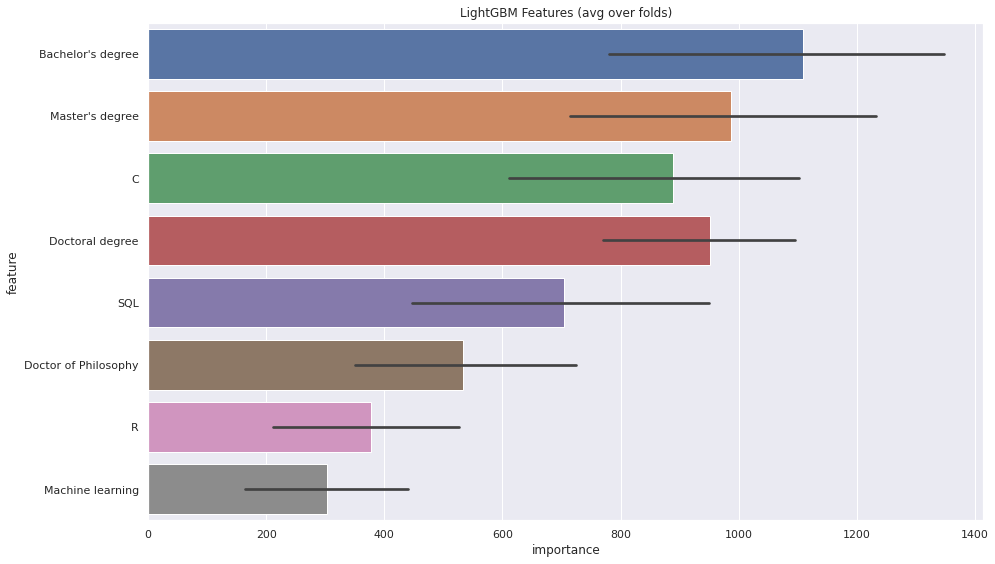

In [54]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[3:11].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14, 8))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

- From the above diagram, we can find the degrees are the most significant factors affecting the salary.
- Other factors, such as the different programing language, and the ability of machine learning, are also important for a job in data science.

- Then we try to find **Top-8** features with which the staff has a higher average salary.

In [55]:
count = df.shape
df_avg = pd.DataFrame(features[2:], columns = ['feature'])
avg = []
for f in features[2:] :
    avg.append(float(sum(df['Salary'][df[f] == 1])/df[df[f] == 1].shape[0]))
df_avg['avg_salary'] = avg
df_avg.sort_values(by=['avg_salary'], inplace = True, ascending=False)

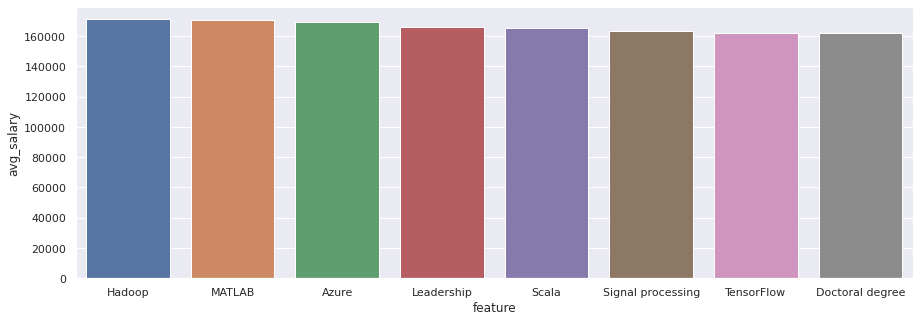

In [56]:
plt.figure(figsize=(15, 5))
sns.set(font_scale = 1)
sns.barplot(x = 'feature', y = 'avg_salary', data = df_avg[0:8])
plt.show()

2. Find the `anomalies` of salary among the staffs.

- Firstly, we calculate the Predict/Real ratios for the salary. Then plot the histogram of the ratios.

In [57]:
df_a = pd.DataFrame({"Job_ID" : test["Job_ID"].values})
df_a["real"] = test['Salary']
df_a["predict"] = predictions
df_a['ratio'] = df_a['predict'] / df_a['real']

<AxesSubplot:xlabel='ratio', ylabel='Count'>

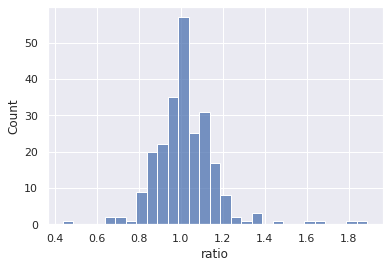

In [58]:
sns.histplot(df_a['ratio'], binwidth = 0.05)

- The histogram of ratios is similar to the normal distribution.
- We set a 90% `confidential interval` for the ratios. And the ratio out of the interval will be identified as `anomaly`.

In [59]:
LL = df_a['ratio'].quantile(0.05)
UL = df_a['ratio'].quantile(0.95)
print("5% percentile of ratios : {}".format(LL))
print("95% percentile of ratios : {}".format(UL))
print("The 90% confidential interval is [{}, {}]".format(LL, UL))

5% percentile of ratios : 0.8292261102096298
95% percentile of ratios : 1.2349846943032237
The 90% confidential interval is [0.8292261102096298, 1.2349846943032237]


- For the ratio under the left range, the company may pay more salary than they are actually capable of earning.
- For the ratio above the right range, the company may pay less than they are actually capable of earning.

- Here we list all the anomalies.

In [60]:
df_a = df_a[(df_a['ratio'] < LL) | (df_a['ratio'] > UL)]
df_a

,Job_ID,real,predict,ratio
8,1034,180000,134051.133201,0.744729
55,1086,85000,141457.660596,1.664208
71,1103,170000,140067.678405,0.823928
77,1109,203221,167140.997403,0.822459
80,1112,220000,177392.829869,0.806331
103,1137,110000,144020.913949,1.309281
104,1138,83000,132295.878851,1.593926
112,1146,210000,172665.549936,0.822217
116,1151,190000,137008.183554,0.721096
125,1160,130000,175071.178384,1.346701


---

## 8. Conclusions

### 1. Answer to our question

#### Predict the salary
- For the best performance model: RMSE is around 25,000, MAE is around 15,000.
- The MAE value indicates the mean absolute error of our best model is around 15,000, which is acceptable since most salaries is between 10,000 and 20,000.
- The higher RMSE means our model may not be quite accurate when predicting a extreme case (too high or low salary).

#### Further insights
- From the weights in the model, we can find the most important factors that may affect the salary. For the job seekers in data science field, these factors can have priorities to pursue.
- The model can be useful for company/individual to check whether the salary is apporperiate. Thus make further changes.

#### More applications
- This project can be used for quantifying an employee's capability in any field with proper datasets, making the job market more accurate and scientific.


### 2. New things we learned

#### 1. Model choosing 
- The dataset requires us to predict numeric response variable using categorical predictors. Therefore, models learnt during the course cannot be applied.
- Hence, we learnd new models to solve the dillema encountered. Meanwhile, we constantly try to find a better model and tune the parameters to improve the accuracy.

#### 2. Dataset preparation
- Some columns in the dataset are too biased(e.g. *Job_Title*, *Level*). There are also columns with too many zeros.
- After cleaning and preparing the dataset, the trained models are still not accurate enough.
- Therefore, for a more accurate prediction, a more balanced dataset is required.